# Finding appropriate prior distributions based on Bobby's simulated annealing.

In our inference, we don't wish to only include likelihoods... we would also like to have more informed priors. Let's look at the data.

In [2]:
import sys, os
sys.path.append("..")
from utils import path as pth
from scipy.io import loadmat
import csv
import numpy as np
import pandas as pd

Two sets of parameters were found; one uses the same standard HCP connectome for all calculations, the other used individual patient connectomes for each parameter search.

In [3]:
HCP_params_path = '/Users/Megan/RajLab/BRAIN/SCFC-spectral-python/SCFC/data/SCFC_opparam_HCP.mat'
IndConn_params_path = '/Users/Megan/RajLab/BRAIN/SCFC-spectral-python/SCFC/data/SCFC_opparam_individual.mat'

In [4]:
HCPdata = loadmat(HCP_params_path)

In [5]:
HCPdata.keys()

dict_keys(['__header__', '__version__', '__globals__', 'output'])

In [6]:
HCPdata['output'].shape

(1, 39)

In [7]:
df = pd.DataFrame(HCPdata['output'][0])

In [8]:
df.head()

,subjname,param,feval,simannealmsg,cfevals
0,[8002.101],"[[0.012], [0.005], [0.5], [5.0], [4.0], [1.0],...",[[-0.8170847971245495]],"[[[[[3500]], [[3648]], ['Optimization terminat...","[[-0.8170847971245495, -0.8170847971245495, -0..."
1,[8008.101],"[[0.011934858833523522], [0.007416371455534797...",[[-0.8481458299887372]],"[[[[[6706]], [[6973]], ['Optimization terminat...","[[-0.7951157225528295, -0.7951157225528295, -0..."
2,[8012.101],"[[0.015953676157214023], [0.008954110012403716...",[[-0.8778002599935318]],"[[[[[4013]], [[4175]], ['Optimization terminat...","[[-0.811164750246104, -0.811164750246104, -0.6..."
3,[8027.101],"[[0.016012950820885972], [0.008461467268632639...",[[-0.777688477204027]],"[[[[[7279]], [[7609]], ['Optimization terminat...","[[-0.7238549961538402, -0.7238549961538402, -0..."
4,[8028.101],"[[0.01565266891377659], [0.0061132652979348796...",[[-0.7898000029556442]],"[[[[[4912]], [[5123]], ['Optimization terminat...","[[-0.764841488328076, -0.764841488328076, -0.7..."


For now, we care about collating the parameter values found for all the subjects, so let's find a way to separate that data out.

In [9]:
params = df['param'].values

In [10]:
subjects = df['subjname'].values

In [11]:
str(subjects[10][0])

'8065.101'

In [12]:
type(params[0][0])

numpy.ndarray

Want to extract the parameters as arrays (we lose the patient data for now) and histogram them. They are in the order:

- tau_e
- tau_i
- alpha
- speed
- gei
- gii
- tauC

In [13]:
tau_e = []
tau_i = []
alpha = []
speed = []
gei = []
gii = []
tau_C = []
i = 0
for array in params:
    if len(array) == 7:
        tau_e.append(array[0][0])
        tau_i.append(array[1][0])
        alpha.append(array[2][0])
        speed.append(array[3][0])
        gei.append(array[4][0])
        gii.append(array[5][0])
        tau_C.append(array[6][0])
        i += 1
    else:
        subject_name = str(subjects[i][0])
        print(subjects[i][0])
        print('Not all parameters available for subject'+ subject_name)
        i += 1

[]
Not all parameters available for subject[]
[]
Not all parameters available for subject[]
[]
Not all parameters available for subject[]


In [14]:
len(tau_e)

36

This is expected from the number of subjects we have.

In [15]:
import matplotlib.pyplot as mpl
%matplotlib inline

Text(0,0.5,'Magnitude (dB)')

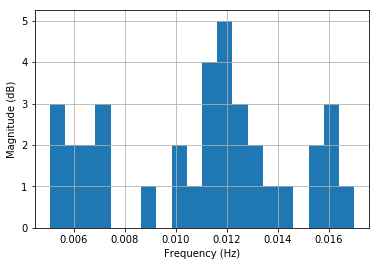

In [16]:
fig1 = mpl.figure(num=5, figsize = (6,4))
mpl.hist(tau_e, 20)

mpl.grid(True)
mpl.xlabel('Frequency (Hz)')
mpl.ylabel('Magnitude (dB)')

Text(0,0.5,'Magnitude (dB)')

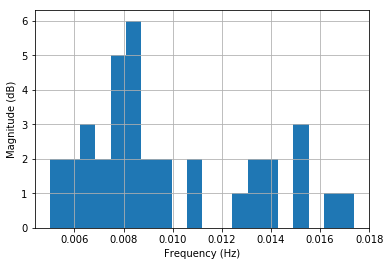

In [17]:
fig2 = mpl.figure(num=5, figsize = (6,4))
mpl.hist(tau_i, 20)

mpl.grid(True)
mpl.xlabel('Frequency (Hz)')
mpl.ylabel('Magnitude (dB)')

Text(0,0.5,'Magnitude (dB)')

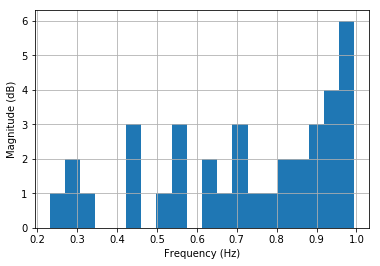

In [18]:
fig3 = mpl.figure(num=5, figsize = (6,4))
mpl.hist(alpha, 20)

mpl.grid(True)
mpl.xlabel('Frequency (Hz)')
mpl.ylabel('Magnitude (dB)')

Before we just plot everything, let's import the individual connectome data and see if there's a difference.

In [19]:
Inddata = loadmat(IndConn_params_path)

In [20]:
Indf = pd.DataFrame(Inddata['output'][0])

In [21]:
Indparams = df['param'].values

Itau_e = []
Itau_i = []
Ialpha = []
Ispeed = []
Igei = []
Igii = []
Itau_C = []
i = 0
for array in Indparams:
    if len(array) == 7:
        Itau_e.append(array[0][0])
        Itau_i.append(array[1][0])
        Ialpha.append(array[2][0])
        Ispeed.append(array[3][0])
        Igei.append(array[4][0])
        Igii.append(array[5][0])
        Itau_C.append(array[6][0])
        i += 1
    else:
        subject_name = str(subjects[i][0])
        print(subjects[i][0])
        print('Not all parameters available for subject'+ subject_name)
        i += 1

[]
Not all parameters available for subject[]
[]
Not all parameters available for subject[]
[]
Not all parameters available for subject[]


Text(0,0.5,'Magnitude (dB)')

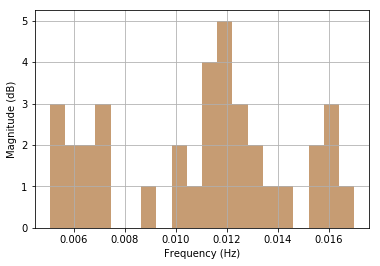

In [22]:
fig1 = mpl.figure(num=5, figsize = (6,4))
mpl.hist(tau_e, 20, alpha = 0.5)
mpl.hist(Itau_e, 20, alpha = 0.5)
mpl.grid(True)
mpl.xlabel('Frequency (Hz)')
mpl.ylabel('Magnitude (dB)')

Text(0,0.5,'Magnitude (dB)')

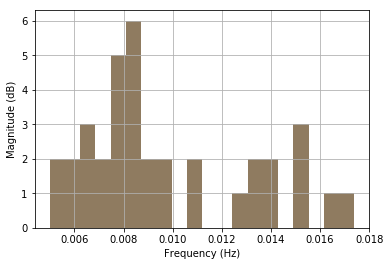

In [23]:
fig2 = mpl.figure(num=5, figsize = (6,4))
mpl.hist(tau_i, 20)
mpl.hist(Itau_i, 20, alpha = 0.5)
mpl.grid(True)
mpl.xlabel('Frequency (Hz)')
mpl.ylabel('Magnitude (dB)')

It seems that individual connectivity has not made a difference to the prior distributions. Let's plot them all.

In [35]:
param_array = [tau_e, tau_i,alpha,speed,gei,gii,tau_C]

In [42]:
param_name = ['tau_e', 'tau_i','alpha','speed','gei','gii','tau_C']

Indicate the bounds used in simulated annealing.

In [55]:
param_lower = [0.005,0.005,0.1,5,0.5,0.5,0.005]
param_upper = [0.02,0.02,1,20,5,5,0.020]

In [34]:
param_array[0] == tau_e

True

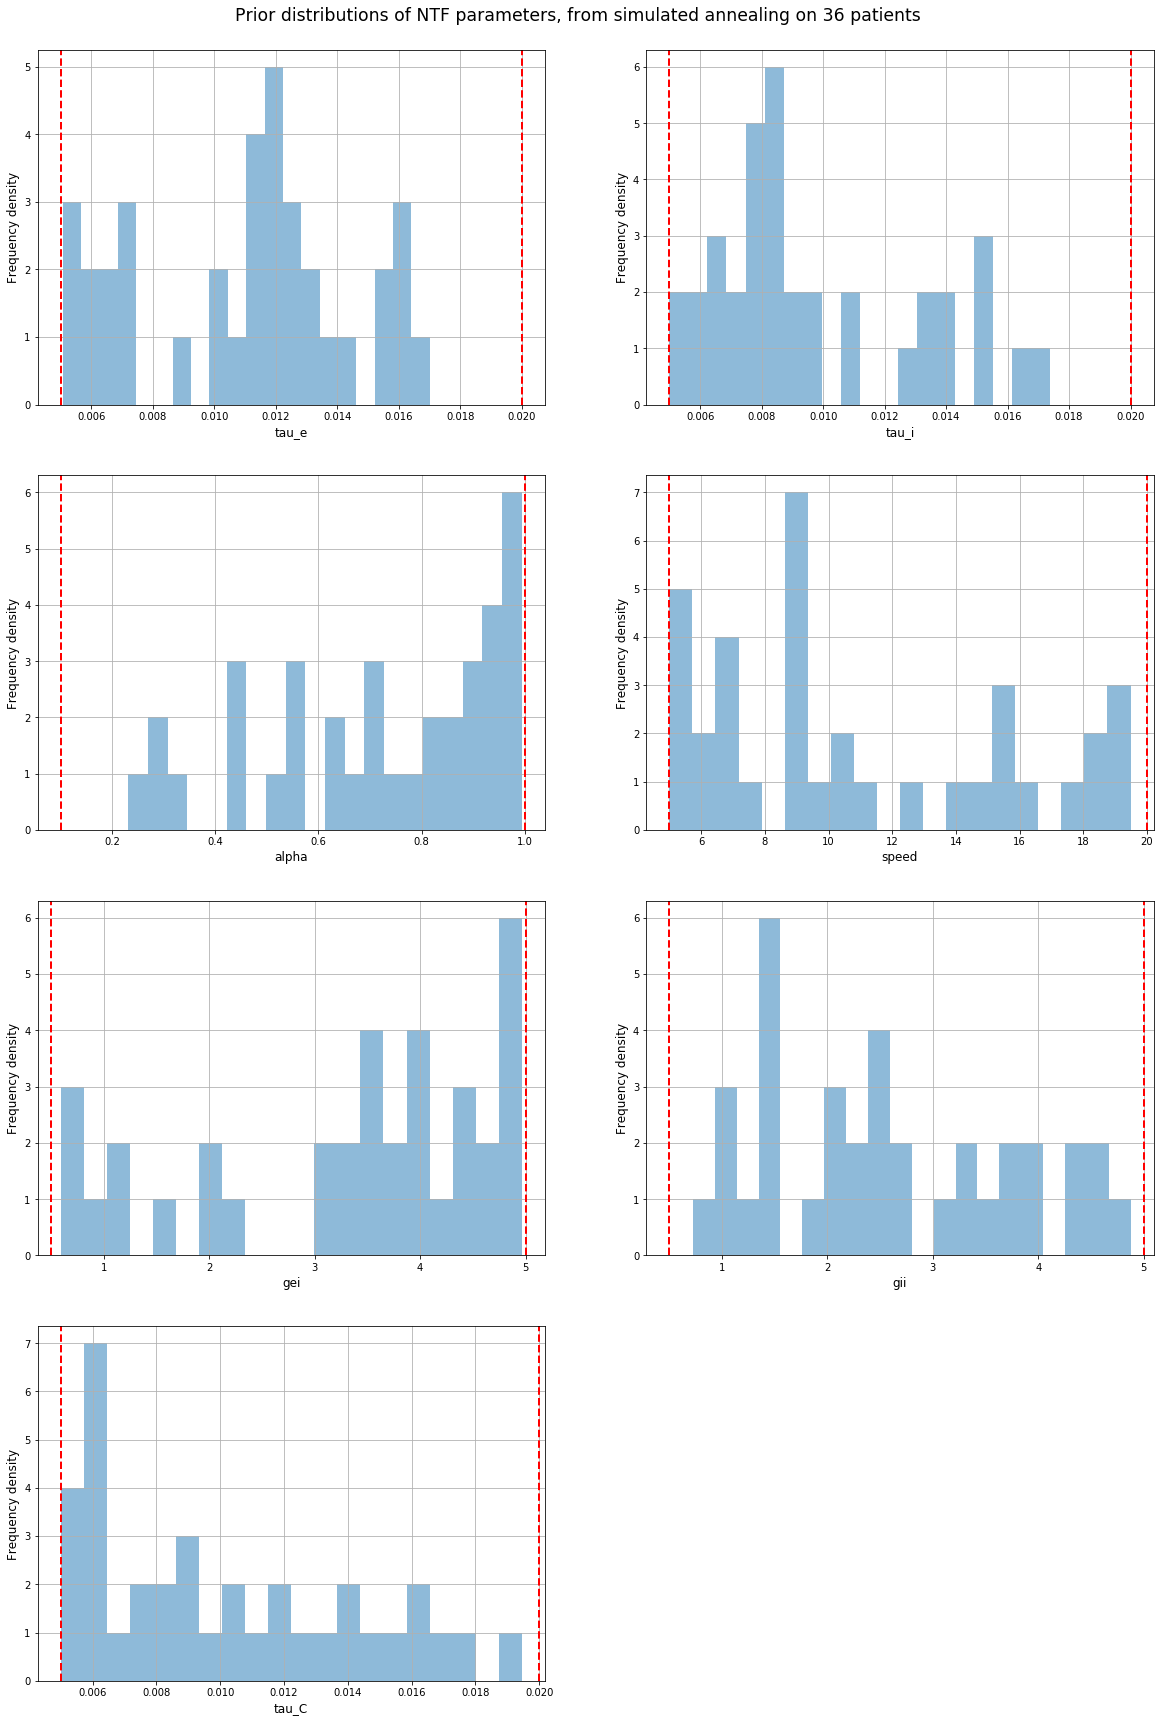

In [57]:
fig3, axes3 = mpl.subplots(4,2, figsize = (20,30))
ax3 = axes3.ravel()
fig3.suptitle('Prior distributions of NTF parameters, from simulated annealing on 36 patients', fontsize = 'xx-large', y = 0.9)
i = 0


for i in range(7):
    mpl.sca(ax3[i])
    mpl.hist(param_array[i], 20, alpha = 0.5)
    ax3[i].grid(True)
    ax3[i].set_ylabel('Frequency density', fontsize = 'large')
    #ax3[i].text(0.9, 0.9,param_name[i],
    # horizontalalignment='center',
    # verticalalignment='center',
    # transform = ax3[i].transAxes, fontsize = 'large')
    ax3[i].set_xlabel(param_name[i], fontsize = 'large')
    ax3[i].axvline(x=param_lower[i], color='r', linestyle='dashed', linewidth=2)
    ax3[i].axvline(x=param_upper[i], color='r', linestyle='dashed', linewidth=2)
    i += 1
mpl.sca(ax3[7])
ax3[7].set_visible(False)
fig3.savefig("paramdistributions_HCPconn.pdf", bbox_inches='tight')

OK, even though it is not initially obvious which distributions should work, let's set up a piece of code to at least do some of the job.

In [66]:
from scipy.stats import norm

In [71]:
m, s = norm.fit(tau_e)

In [72]:
x = np.linspace(0, 0.02, 100)

Text(0,0.5,'Magnitude (dB)')

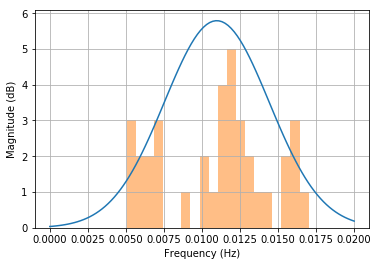

In [80]:
y = 0.05*(1 / (np.sqrt(2 * np.pi * np.power(s, 2)))) * \
    (np.power(np.e, -(np.power((x - m), 2) / (2 * np.power(s, 2)))))
fig4 = mpl.figure(num=5, figsize = (6,4))
mpl.plot(x,y)
mpl.hist(param_array[0], 20, alpha = 0.5)
mpl.grid(True)
mpl.xlabel('Frequency (Hz)')
mpl.ylabel('Magnitude (dB)')

In [77]:
from scipy.stats import gamma

In [78]:
a = gamma.fit(tau_e)

In [79]:
y = gamma.pdf(x,a)
fig5 = mpl.figure(num=5, figsize = (6,4))
mpl.plot(x,y)
mpl.hist(param_array[0], 20, alpha = 0.5)
mpl.grid(True)
mpl.xlabel('Frequency (Hz)')
mpl.ylabel('Magnitude (dB)')

ValueError: operands could not be broadcast together with shapes (3,) (100,) 